# Explore here

In [1]:
# Your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
print(data.describe())
print(data.isnull())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [3]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    data[col] = data[col].replace(0, data[col].mean())

In [4]:
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.7662337662337663


In [9]:
models = [
    RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
]

for i, model in enumerate(models, start=1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model {i} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Model 1 - Accuracy: 0.7662
Model 2 - Accuracy: 0.7662
Model 3 - Accuracy: 0.7468


In [8]:
import joblib
joblib.dump(rf, "random_forest_diabetes_model.pkl")

['random_forest_diabetes_model.pkl']

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, None]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [17]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'n_estimators': 100}
Best cross-validated accuracy: 0.7785019325603093


In [18]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Test accuracy with best model:", accuracy_score(y_test, y_pred))

Test accuracy with best model: 0.7662337662337663


In [19]:
# Quick EDA for reference

print(data.head())        
print(data.info())        
print(data.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose    

In [20]:
print(data.isnull().sum()) 



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [21]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    print(f"{col} has {data[data[col] == 0].shape[0]} zeroes")

Glucose has 0 zeroes
BloodPressure has 0 zeroes
SkinThickness has 0 zeroes
Insulin has 0 zeroes
BMI has 0 zeroes


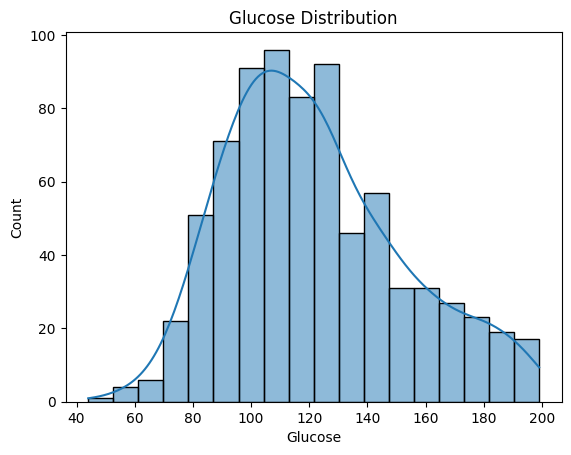

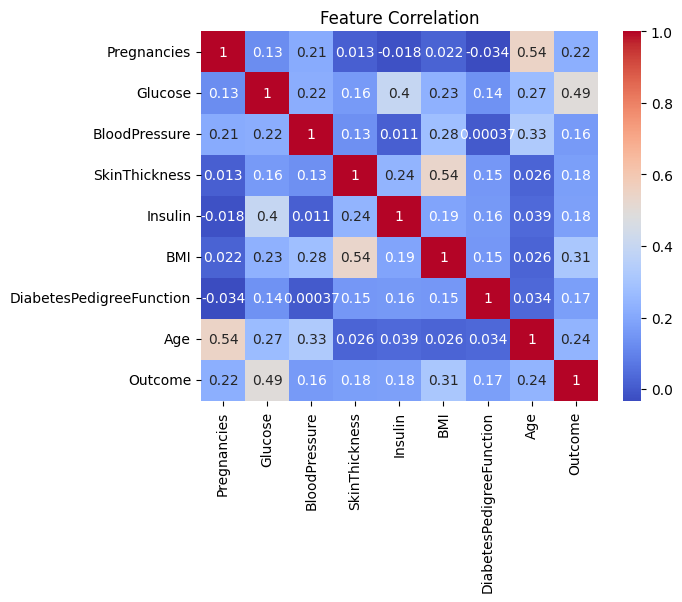

In [22]:
# Distribution of a feature like Glucose
sns.histplot(data["Glucose"], kde=True)
plt.title("Glucose Distribution")
plt.show()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

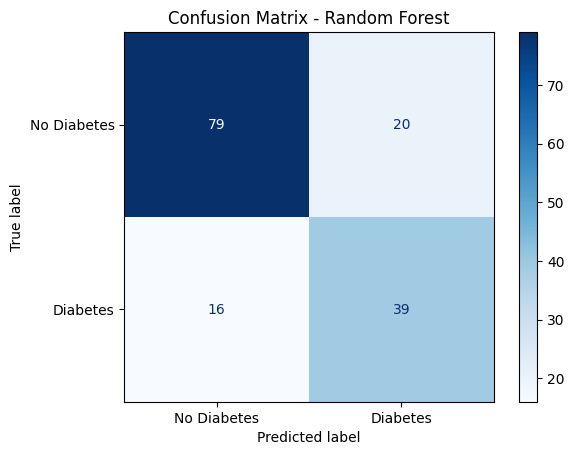

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


y_pred = best_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()